In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import argparse
import os
import itertools as it
import math
import shapely

In [3]:
path1 = 'C:/Users/User/Desktop/barcode_proj/images/datamatrix/pair1.jpg'

image_coloured = cv2.imread(path1)
image = cv2.cvtColor(image_coloured, cv2.COLOR_BGR2GRAY)

In [4]:
#median blur helps to eliminate salt&pepper noise - if it lowers DataMatrix decoding accuracy, it can be changed or eliminated.
blurred = cv2.medianBlur(image,3)


adapt_mean = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,35,2)


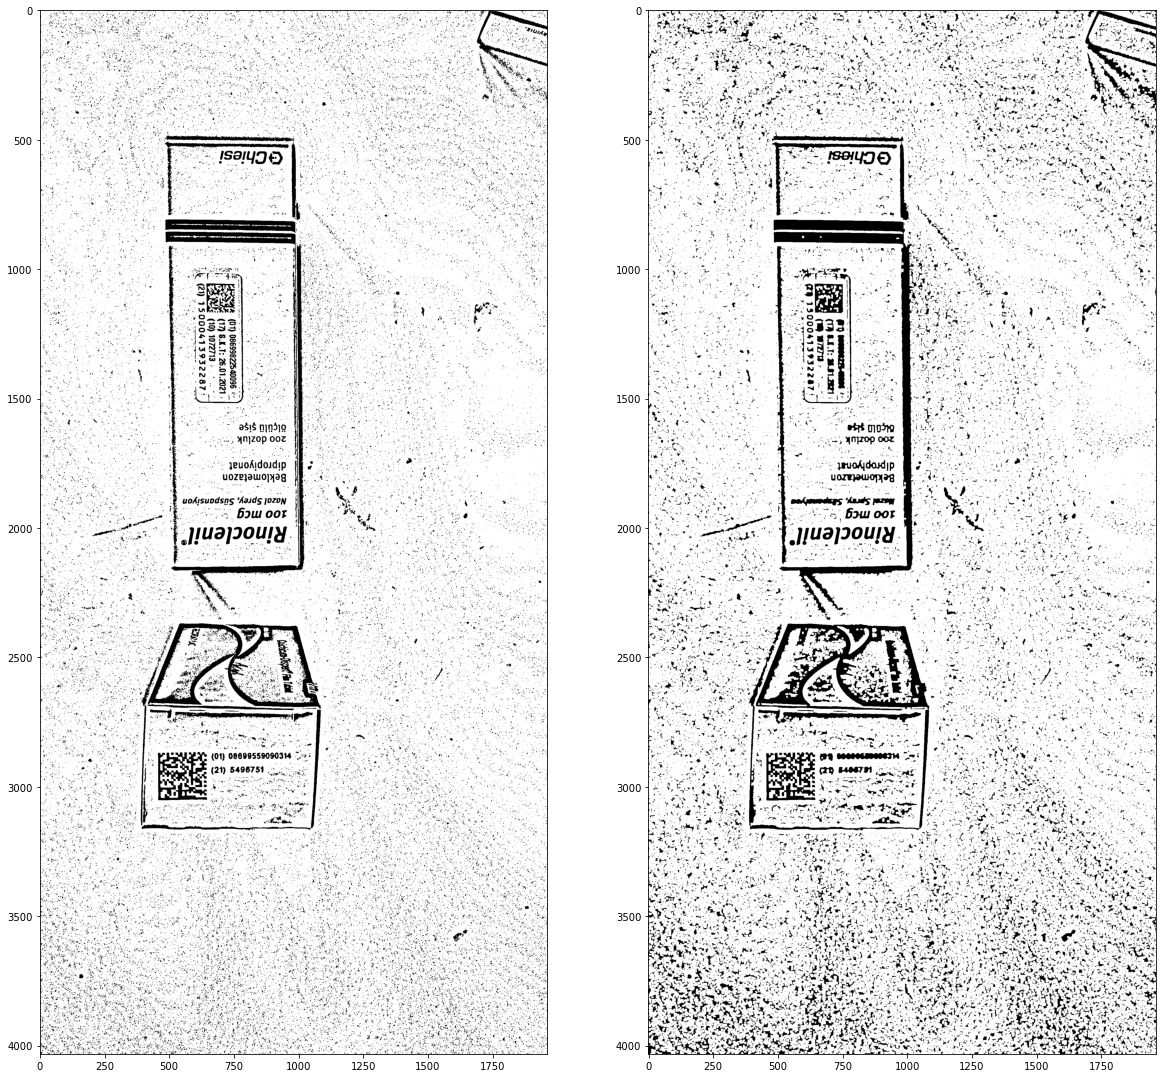

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(6,6))
opened = cv2.morphologyEx(adapt_mean, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.imshow(adapt_mean,'gray')

plt.subplot(1,2,2)
plt.imshow(opened,'gray')

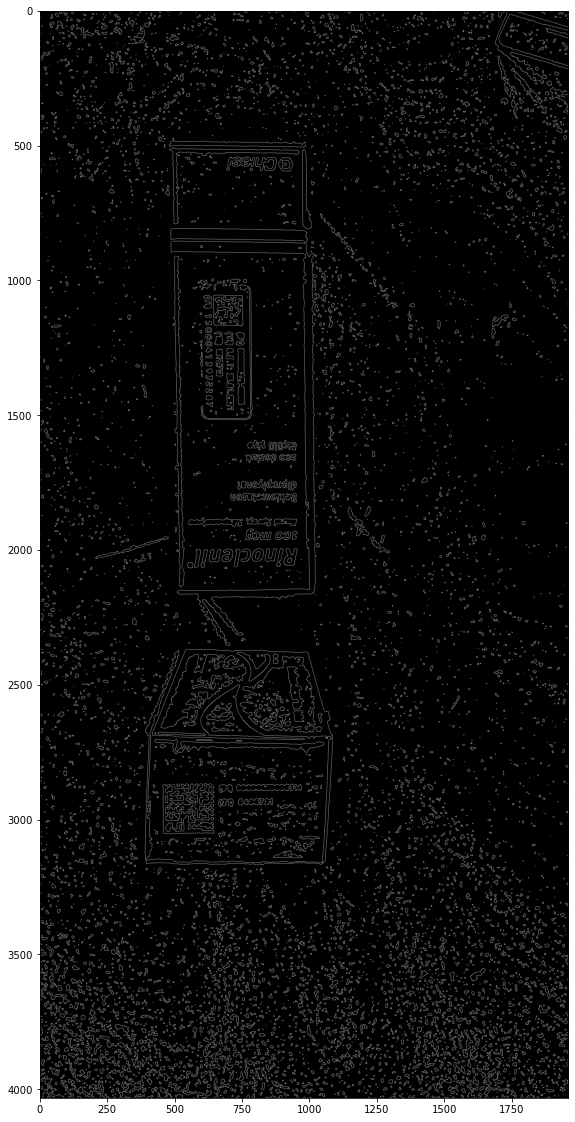

In [6]:
blurred_new = cv2.medianBlur(opened ,5) 


v = np.median(blurred_new)
sigma = 0.33

#---- Apply automatic Canny edge detection using the computed median----

lower = int(max(0, (1.0 - sigma) * v))
upper = int(min(255, (1.0 + sigma) * v))
edged = cv2.Canny(blurred_new, lower, upper)

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.imshow(edged,cmap ='gray')


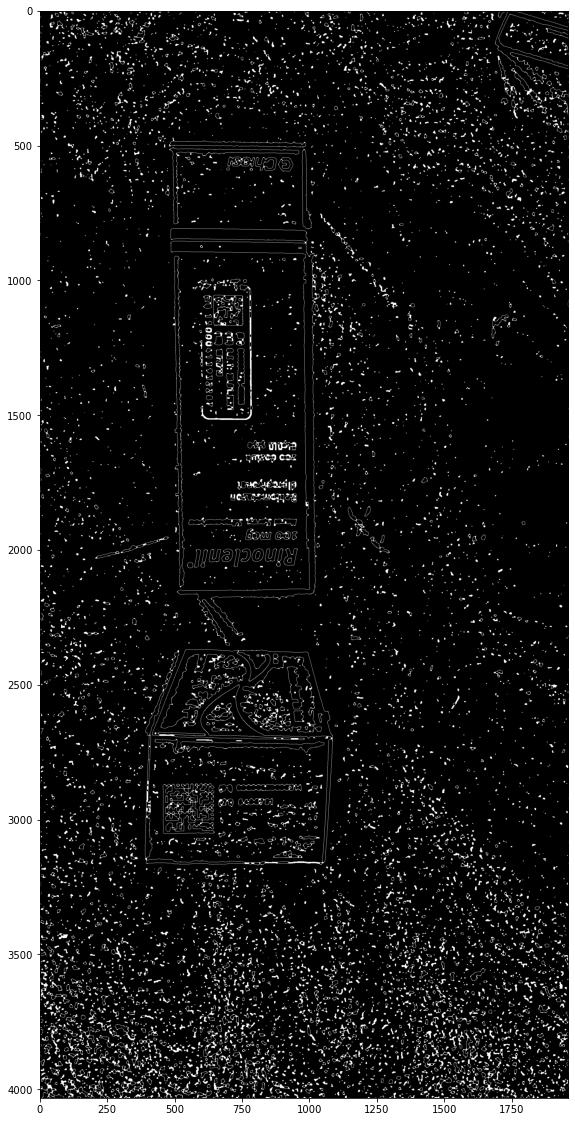

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax.imshow(closed,cmap ='gray')

In [8]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cs = []
for i in range(len(contours)):
    approx = cv2.convexHull(contours[i])

    if cv2.contourArea(approx)>area_threshold :
            cs.append(approx) 


cntim = image_coloured.copy()
cntim = cv2.drawContours(cntim, cs, -1, (0,255,0), 3)

plt.figure(figsize=(30,30))

plt.imshow(cntim)


NameError: name 'area_threshold' is not defined

In [ ]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

area_threshold = 50*50
aspect_ratio_threshold = 7
irregularity_threshold = 0.5
adjacency_threshold = 0.5

In [ ]:
from shapely.geometry import Polygon

In [1]:
rects = []
boxes = []
dataMatrice_candidates = []

for i in range(len(contours)):
    approx = cv2.convexHull(contours[i])
    
    #intersection = 0

    contArea = cv2.contourArea(approx)
    
    #AREA THRESHOLD
    if contArea > area_threshold :
        
        #IRREGULARITY (NON-RECTANGULARITY) MEASUREMENT
        irregularity = 0
        aspect_ratio = 0
    
        rect = cv2.minAreaRect(approx)
        (x1,y1),(w1,h1),_ = rect
        
        rectArea = w1*h1

        irregularity = abs(rectArea-contArea)/rectArea
        
        #ASPECT RATIO MEASUREMENT
        aspect_ratio = w1/h1
        
        
        if irregularity < irregularity_threshold and 1/aspect_ratio_threshold < aspect_ratio < aspect_ratio_threshold:
            
            #SHAPE INTERACTIONS----------------------------------------------------------------------------------- 
            
            addRect = True
            j = 0
            
            box = cv2.boxPoints(rect)
            box = np.int0(box) 
            boxPoly1 = Polygon(box)
            
            while j < len(rects):
                (x2,y2),(w2,h2),_ = rects[j]

                boxPoly2 = Polygon(boxes[j])
                
                #CHECK FOR DUPLICATES
                if boxPoly1.almost_equals(boxPoly2, decimal=3):
                    addRect = False
                    break
                
                #FIND SHAPES CROSSING, TOUCHING OR IN CLOSE PROXIMITY (DETERMINED BY THRESHOLD)
                if not boxPoly1.crosses(boxPoly2) \
                or boxPoly1.touches(boxPoly2) \
                or boxPoly1.distance(boxPoly2) < min(w1,h1,w2,h2)*adjacency_threshold :
                    #print("interacting shapes")
                    rectArea2 = w2*h2
                    #print("cross or touch: ",boxPoly1.crosses(boxPoly2),boxPoly1.touches(boxPoly2))
                    
                    #print("distance/min(w1,h1,w2,h2) : ",boxPoly1.distance(boxPoly2)/min(w1,h1,w2,h2))
                    #print("distance: ",boxPoly1.distance(boxPoly2))
                    
                    if rectArea <= rectArea2:
                        addRect = False
                        #print("eliminated : ",rectArea,rectArea2, rect)
                        break
                    else:
                        #print("DELETER : ",rects[j], rectArea)
                        #print("DELETED : ",rectArea2)
                        del rects[j]
                        del boxes[j]
                else: 
                    #print("distance/min(w1,h1,w2,h2) : ",boxPoly1.distance(boxPoly2)/min(w1,h1,w2,h2))
                    j+=1
                        
                        
            if addRect:
                rects.append(rect)
                boxes.append(box)
                #print("RECT: ",rect)

rect_img = image_coloured.copy()

rect_img = cv2.drawContours(rect_img, boxes, -1, (100,30,100), 5) 

plt.figure(figsize=(50,50))

plt.imshow(rect_img)



#cv2.imwrite('C:/Users/User/Desktop/barcode_proj/images/results/white_background3.jpg',contoured)




NameError: name 'contours' is not defined

In [ ]:
#FIND DATAMATRICES
for i in range(len(rects))

In [ ]:
boxes = []
for rect in rects:
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    boxes.append(box)
    

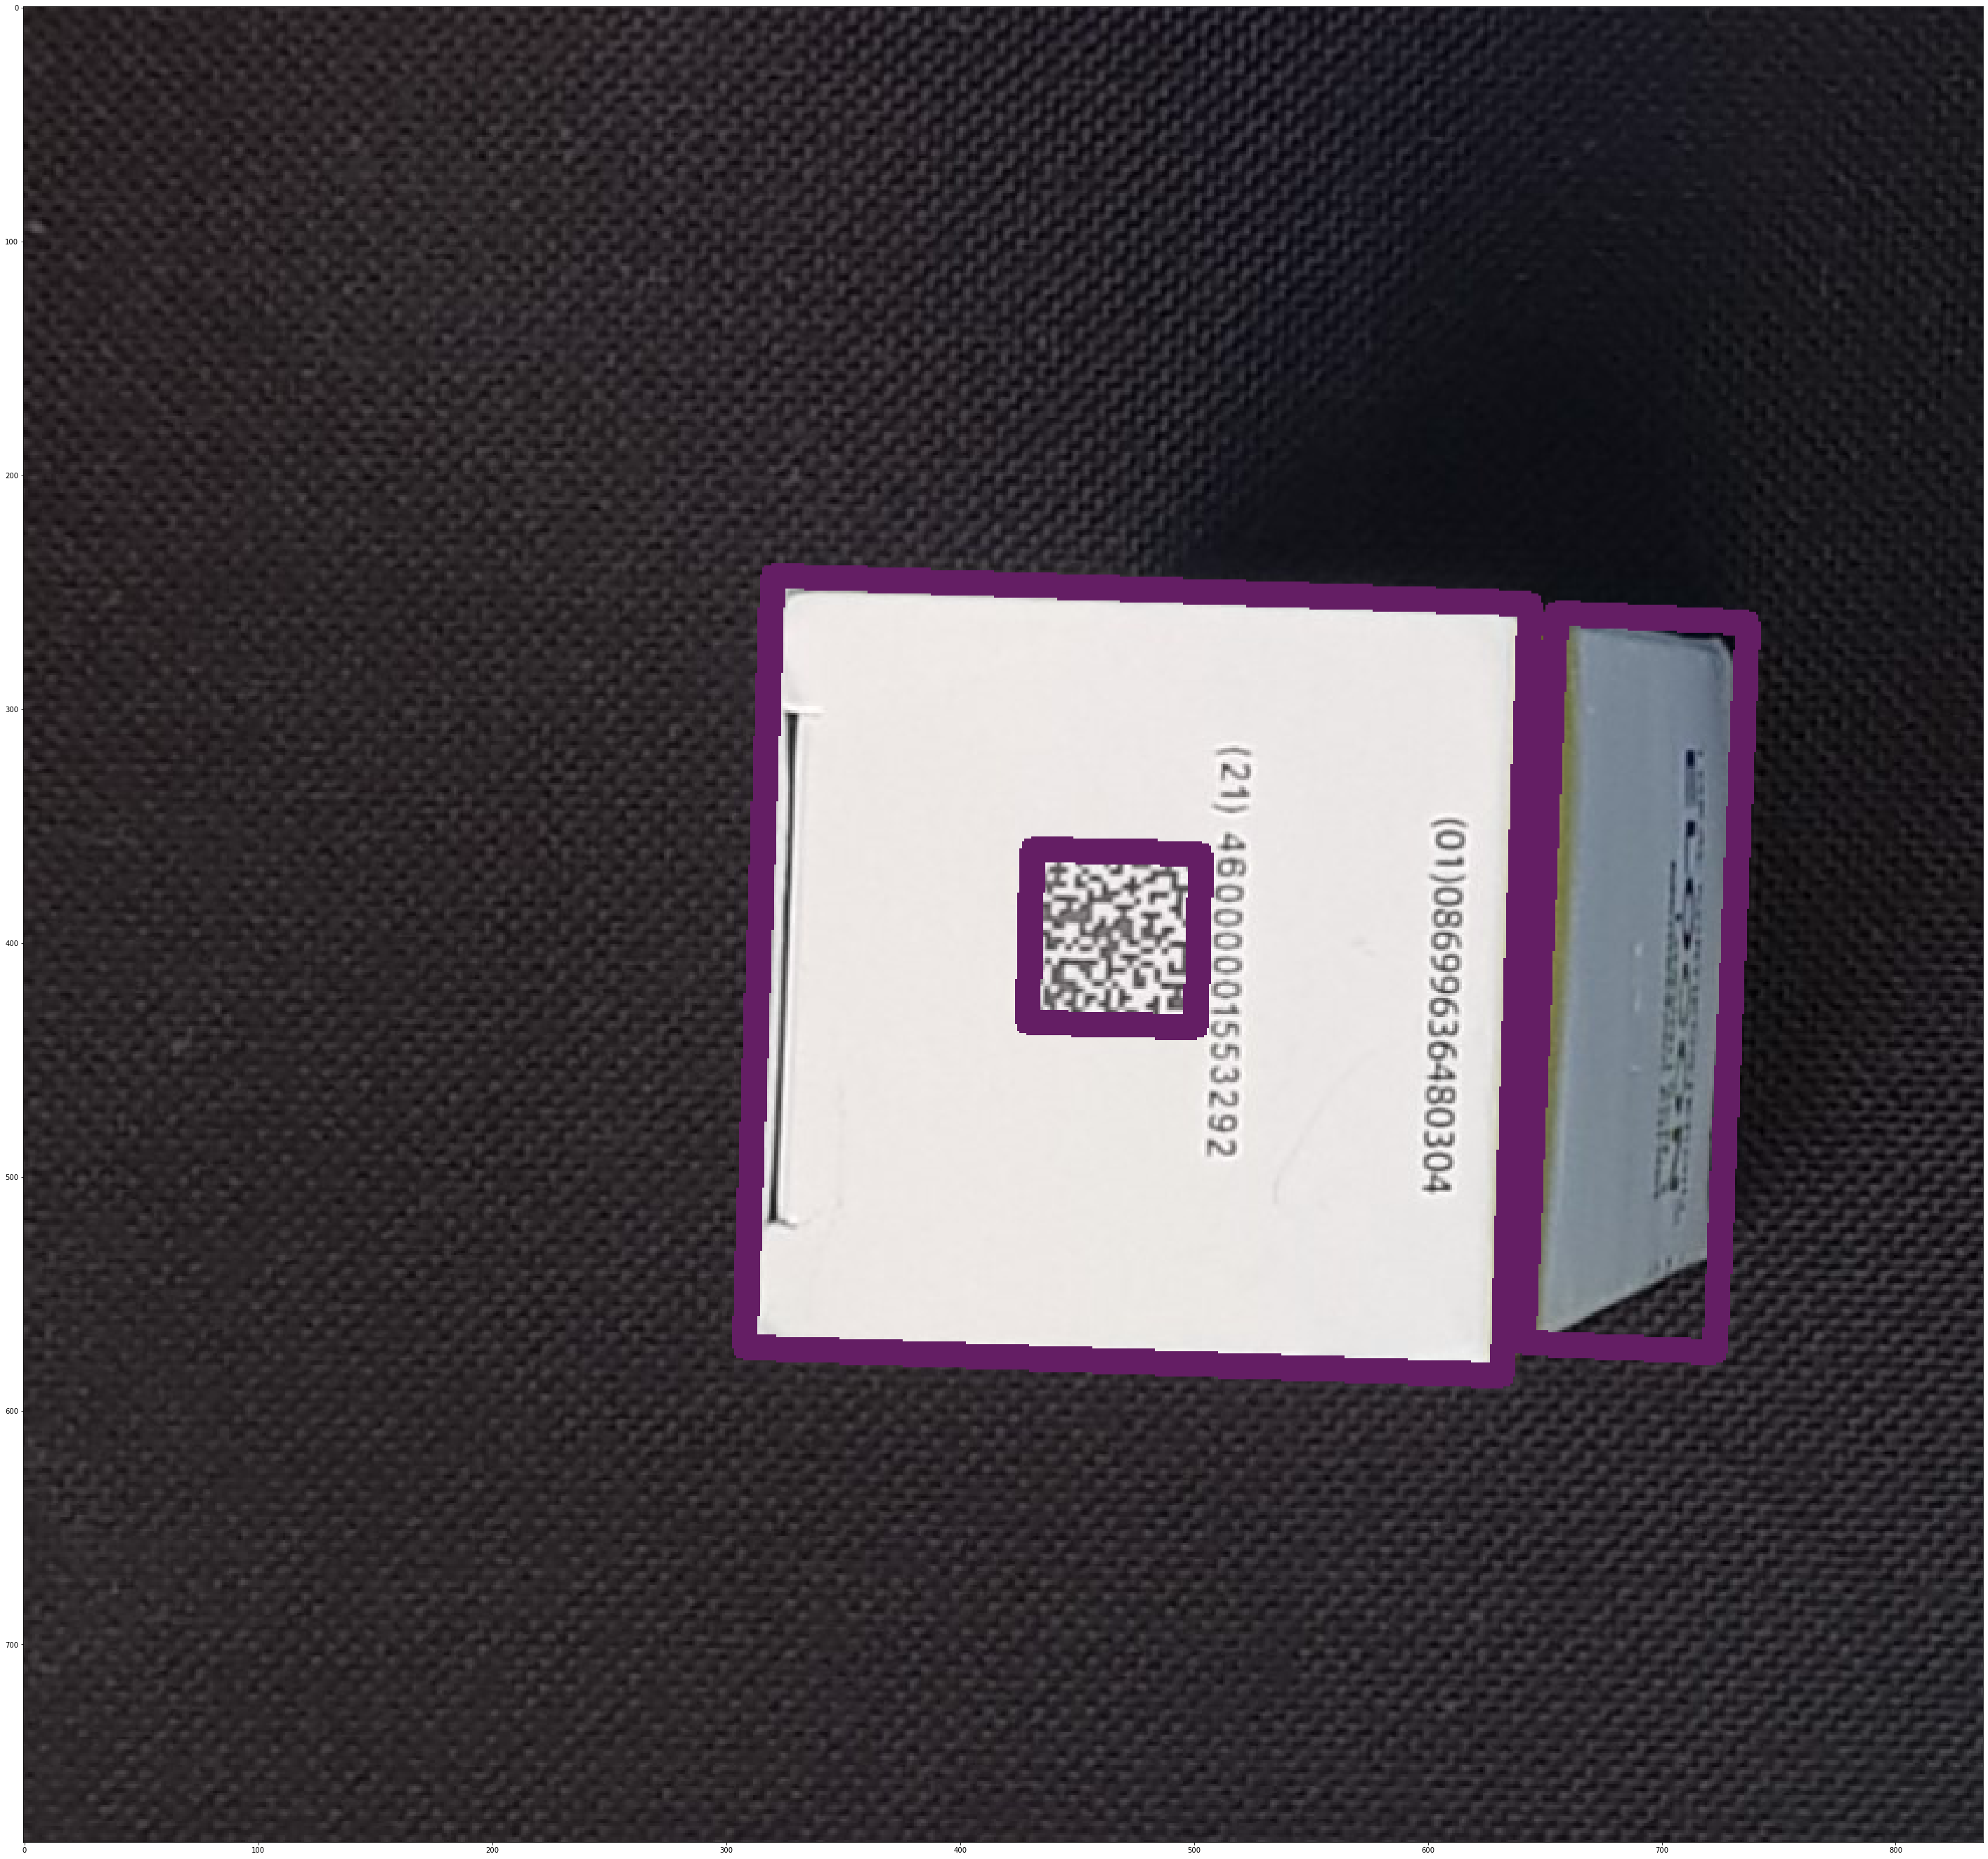

In [13]:
rect_img = image_coloured.copy()
boxes = []
for rect in rects:
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    boxes.append(box)

rect_img = cv2.drawContours(rect_img, boxes, -1, (100,30,100), 10) 


plt.figure(figsize=(50,50))

plt.imshow(rect_img)

In [13]:
approx_cnts = []
rects = []
boxes = []


for i in range(len(contours)):
    approx = cv2.convexHull(contours[i])
    
    #intersection = 0

    contArea = cv2.contourArea(approx)
    
    #AREA THRESHOLD
    if contArea > area_threshold :
        
        #IRREGULARITY (NON-RECTANGULARITY) MEASUREMENT
        irregularity = 0
        aspect_ratio = 0
    
        rect = cv2.minAreaRect(approx)
        (x1,y1),(w1,h1),_ = rect
        
        rectArea = w1*h1

        irregularity = abs(rectArea-contArea)/rectArea
        
        #ASPECT RATIO MEASUREMENT
        aspect_ratio = w1/h1
        
        
        if irregularity < irregularity_threshold and 1/aspect_ratio_threshold < aspect_ratio < aspect_ratio_threshold:
            
        
            #intersection measurement 
            addRect = True
            j = 0
            while j < len(rects):
                print("j ",j)
                (x2,y2),(w2,h2),_ = rects[j]
                contArea2 = cv2.contourArea(approx_cnts[j])
                
                realDistance = math.sqrt( (x1-x2)**2 + (y1-y2)**2 )
                print("real distance: ",realDistance)
                #CHECK FOR DUPLICATES
                if abs(contArea-contArea2)/min(contArea,contArea2) < 0.01 and realDistance < min(w1,h1,w2,h2)*0.05:
                    addRect = False
                    break
                
                #ADJACENCY AND INTERSECTION CALCULATIONS
                
                #adjDistance = math.sqrt( ((w1+w2)/2)**2 + ((h1+h2)/2)**2 )
                #print("adj distance: ",adjDistance)
                
                #gap = (realDistance-adjDistance)/adjDistance 
                #print("gap ",gap)
                
                
                #-----------------------------------------------------------
                
                
                
                
                
                
                
                #-----------------------------------------------------------
                
                if gap < adjacency_threshold :
                    
                    #Intersetion calculations
                    
                    area , _= cv2.intersectConvexConvex(approx,approx_cnts[j], False)
                    print("area ",area)
                    print("contArea2 " ,contArea2 , " contArea ",contArea)
                    if contArea2 > contArea and (gap>0 or  (area and  abs(contArea-area)/area > 0.01) ) :
                        addRect = False
                        print("eliminated : ")
                        print("DELETE : gap:",gap,contArea,area)
                        break
                    elif contArea2 < contArea and (gap>0 or  (area and abs(contArea2-area)/area > 0.01) ) :
                        print("DELETER : ",rect)
                        print("DELETE : gap:",gap,contArea2,area)
                        del rects[j]
                        del approx_cnts[j]
                    else: j+=1 
                else: 
                    j+=1
                    
            if addRect:
                rects.append(rect)
                approx_cnts.append(approx)
                print("RECT: ",rect)

rect_img = image_coloured.copy()

rect_img = cv2.drawContours(rect_img, approx_cnts, -1, (100,30,100), 5) 

plt.figure(figsize=(50,50))

plt.imshow(rect_img)



#cv2.imwrite('C:/Users/User/Desktop/barcode_proj/images/results/white_background3.jpg',contoured)


NameError: name 'outBoxes' is not defined